In [1]:
# IMPORT DEPENDENCIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import re

In [2]:
# Download NLTK resources (run once)
nltk.download('stopwords')

# Load the combined dataset
df = pd.read_csv('../data/processed/combined_hybrid_student_reddit_data.csv')

# Create a 'source' column for analysis (Student vs Reddit)
df['source'] = df['clean_text'].apply(lambda x: 'Student (Synthetic)' if 'student' in str(x).lower() else 'Reddit (Natural)')

print(f"Total Records: {len(df)}")
print(df['source'].value_counts())
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NUGGET\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total Records: 70299
source
Reddit (Natural)       41991
Student (Synthetic)    28308
Name: count, dtype: int64


,binary_label,clean_text,source
0,1,how much do you currently spend per month on y...,Reddit (Natural)
1,1,the first time i had my youth ahead of me.the ...,Reddit (Natural)
2,0,demonyita talaga hisu nyo —,Reddit (Natural)
3,1,i am in a place in life where i feel so numb. ...,Reddit (Natural)
4,1,just took 25 pills idk if imma be here when i ...,Reddit (Natural)


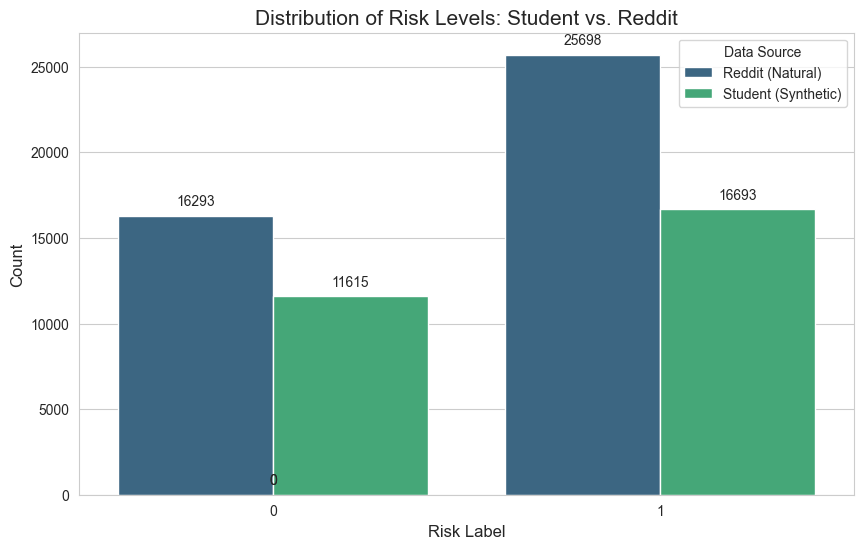

In [3]:
# Set visual style
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='binary_label', data=df, hue='source', palette='viridis')

plt.title('Distribution of Risk Levels: Student vs. Reddit', fontsize=15)
plt.xlabel('Risk Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Data Source')

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


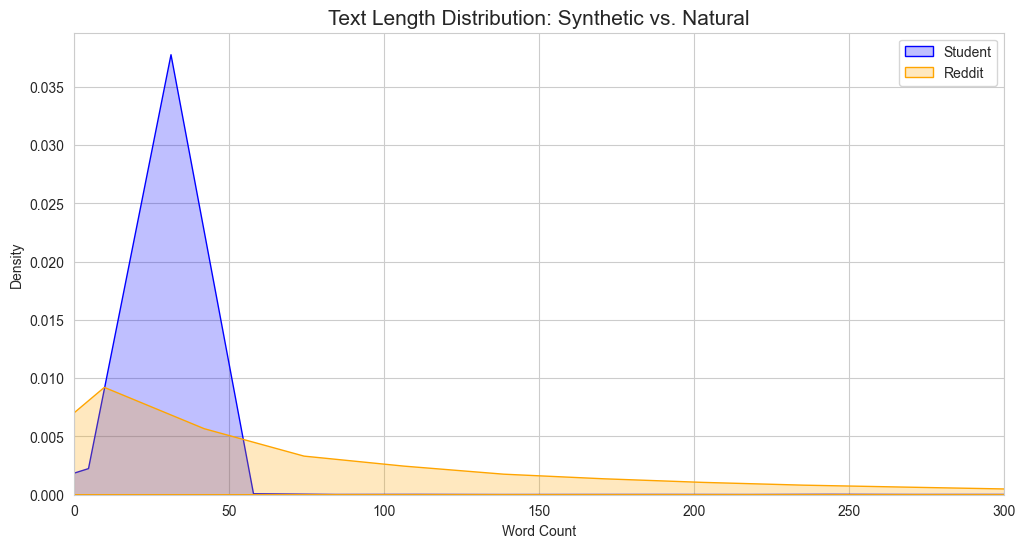

Average Word Count (Student): 31.099512505298854
Average Word Count (Reddit): 101.81884213283799


In [4]:
# Calculate word counts
df['word_count'] = df['clean_text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))

# Plot distributions overlapping
sns.kdeplot(data=df[df['source'] == 'Student (Synthetic)'], x='word_count', fill=True, label='Student', color='blue')
sns.kdeplot(data=df[df['source'] == 'Reddit (Natural)'], x='word_count', fill=True, label='Reddit', color='orange')

plt.title('Text Length Distribution: Synthetic vs. Natural', fontsize=15)
plt.xlabel('Word Count')
plt.xlim(0, 300)  # Limit x-axis to see the bulk of data (Reddit has some massive outliers)
plt.legend()

plt.show()

# Print average word count
print("Average Word Count (Student):", df[df['source'] == 'Student (Synthetic)']['word_count'].mean())
print("Average Word Count (Reddit):", df[df['source'] == 'Reddit (Natural)']['word_count'].mean())


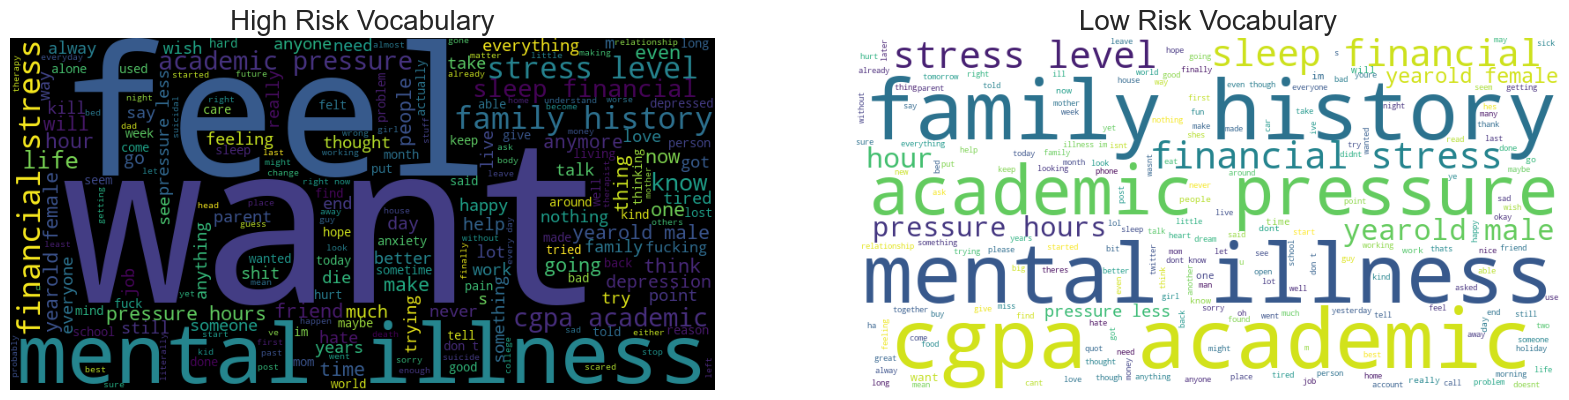

In [5]:
# Clean text function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    return text

# Prepare text buckets
high_risk_text = " ".join(df[df['binary_label'] == 1]['clean_text'].apply(clean_text))
low_risk_text = " ".join(df[df['binary_label'] == 0]['clean_text'].apply(clean_text))

# Define Stopwords 
custom_stops = set(STOPWORDS)
custom_stops.update(['subject', 'student', 'year', 'old', 'reports', 'wa'])

# Generate WordClouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

wordcloud1 = WordCloud(width=800, height=400, background_color='black', stopwords=custom_stops).generate(high_risk_text)
ax1.imshow(wordcloud1)
ax1.set_title('High Risk Vocabulary', fontsize=20)
ax1.axis('off')

wordcloud2 = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stops).generate(low_risk_text)
ax2.imshow(wordcloud2)
ax2.set_title('Low Risk Vocabulary', fontsize=20)
ax2.axis('off')

plt.show()


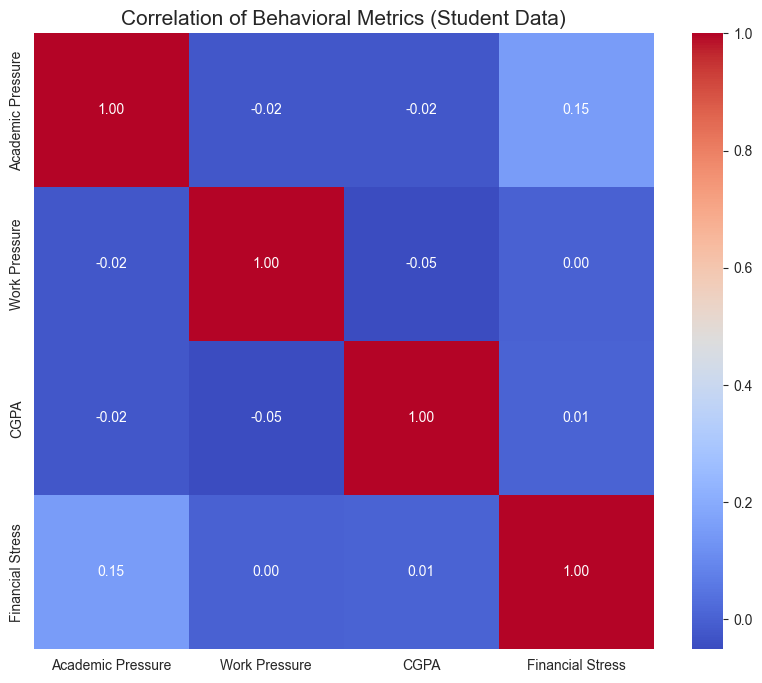

In [6]:
# Load the original Student dataset for this specific plot
student_raw = pd.read_csv('../data/raw/student_depression_dataset.csv')


# Select numerical columns only for correlation
numeric_cols = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Financial Stress']

for col in numeric_cols:
    student_raw[col] = (
        student_raw[col]
        .replace('?', np.nan)
        .astype(float)
    )
    
corr_matrix = student_raw[numeric_cols].corr()




# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Behavioral Metrics (Student Data)', fontsize=15)
plt.show()
